# C3M2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply Poisson Regression to real data.
2. Learn and practice working with and interpreting Poisson Regression Models.
3. Understand deviance and how to conduct hypothesis tests with Poisson Regression.
4. Recognize when a model shows signs of overdispersion.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [15]:
# Load the required packages
library(MASS)

# Problem 1: Poisson Estimators

Let $Y_1,...,Y_n \overset{i}{\sim} Poisson(\lambda_i)$. Show that, if $\eta_i = \beta_0$, then the maximum likelihood estimator of $\lambda_i$ is $\widehat\lambda_i = \bar{Y}$, for all $i=1,...,n$.

Let $ Y_1, \dots, Y_n \overset{iid}{\sim} \text{Poisson}(\lambda_i) $. Show that, if $ \eta_i = \beta_0 $, then the maximum likelihood estimator of $ \lambda_i $ is $ \widehat{\lambda}_i = \bar{Y} $, for all $i = 1, \dots, n $.

#### Setup
Let $ Y_1, Y_2, \dots, Y_n \overset{iid}{\sim} \text{Poisson}(\lambda_i) $. The probability mass function (PMF) of a Poisson random variable $ Y_i $ with parameter $\lambda_i $ is:

$$
P(Y_i = y_i \mid \lambda_i) = \frac{\lambda_i^{y_i} e^{-\lambda_i}}{y_i!}, \quad y_i \in \{0, 1, 2, \dots \}
$$

#### Log-Likelihood Function
The likelihood function for the sample $ Y_1, \dots, Y_n $ is the product of the individual probabilities:

$$
L(\lambda_1, \dots, \lambda_n \mid Y_1, \dots, Y_n) = \prod_{i=1}^n \frac{\lambda_i^{y_i} e^{-\lambda_i}}{y_i!}
$$

Taking the natural logarithm of the likelihood function, we obtain the log-likelihood function:

$$
\log L(\lambda_1, \dots, \lambda_n \mid Y_1, \dots, Y_n) = \sum_{i=1}^n \left( y_i \log(\lambda_i) - \lambda_i - \log(y_i!) \right)
$$

#### Given Assumption: $ \eta_i = \beta_0 $
We are given that $ \eta_i = \beta_0 $. If $ \eta_i = \log(\lambda_i) $, then $ \lambda_i = e^{\beta_0} $. This implies that all $ \lambda_i $ are equal, i.e., $ \lambda_i = \lambda $ for all $ i $. Thus, we need to estimate a common $ \lambda $ for all observations.

With this simplification, the log-likelihood function becomes:

$$
\log L(\lambda \mid Y_1, \dots, Y_n) = \sum_{i=1}^n \left( y_i \log(\lambda) - \lambda - \log(y_i!) \right)
$$

#### Maximizing the Log-Likelihood
To find the MLE, we take the derivative of the log-likelihood function with respect to $ \lambda $ and set it equal to zero.

1. **Derivative of the log-likelihood function**:

$$
\frac{d}{d\lambda} \log L(\lambda \mid Y_1, \dots, Y_n) = \sum_{i=1}^n \left( \frac{y_i}{\lambda} - 1 \right)
$$

2. **Set the derivative equal to zero**:

$$
\sum_{i=1}^n \left( \frac{y_i}{\lambda} - 1 \right) = 0
$$

Simplifying this equation:

$$
\sum_{i=1}^n \frac{y_i}{\lambda} = n
$$

$$
\frac{1}{\lambda} \sum_{i=1}^n y_i = n
$$

$$
\lambda = \frac{1}{n} \sum_{i=1}^n y_i = \bar{Y}
$$

Thus, the MLE for $ \lambda $ is:

$$
\widehat{\lambda} = \bar{Y}
$$

#### Conclusion
The MLE of $ \lambda_i $ under the assumption that $ \eta_i = \beta_0 $ (i.e., $ \lambda_i $) is the same for all $ i $ is $ \widehat{\lambda} = \bar{Y} $, the sample mean of the observations. Therefore, the maximum likelihood estimator of $ \lambda_i $ is:

$$
\widehat{\lambda}_i = \bar{Y} \quad \text{for all} \ i = 1, \dots, n.
$$


# Problem 2: Ships data

The ships dataset gives the number of damage incidents and aggregate months of service for different types of ships broken down by year of construction and period of operation. 

The code below splits the data into a training set (80% of the data) and a test set (the remaining 20%).

In [3]:
data(ships)
ships = ships[ships$service != 0,]
ships$year = as.factor(ships$year)
ships$period = as.factor(ships$period)

set.seed(11)
n = floor(0.8 * nrow(ships))
index = sample(seq_len(nrow(ships)), size = n)

train = ships[index, ]
test = ships[-index, ]
head(train)
summary(train)

,type,year,period,service,incidents
,<fct>,<fct>,<fct>,<int>,<int>
40,E,75,75,542,1
28,D,65,75,192,0
18,C,60,75,552,1
19,C,65,60,781,0
5,A,70,60,1512,6
32,D,75,75,2051,4


 type  year   period     service          incidents    
 A:5   60:7   60:11   Min.   :   45.0   Min.   : 0.00  
 B:5   65:8   75:16   1st Qu.:  318.5   1st Qu.: 0.50  
 C:6   70:8           Median : 1095.0   Median : 2.00  
 D:7   75:4           Mean   : 5012.2   Mean   :10.63  
 E:4                  3rd Qu.: 2202.5   3rd Qu.:11.50  
                      Max.   :44882.0   Max.   :58.00  

### 2. (a) Poisson Regression Fitting

Use the training set to develop an appropriate regression model for `incidents`, using `type`, `period`, and `year` as predictors (HINT: is this a count model or a rate model?).

Calculate the mean squared prediction error (MSPE) for the test set. Display your results.

In [16]:
# Fit Poisson regression model with offset for service
model = glm(incidents ~ type + period + year, family = poisson, data = train)

# Predict and calculate MSPE on test set
pred = predict(model, newdata = test, type = "response")
mspe = mean((test$incidents - pred)^2)

# Display Results
summary(model)
paste('Model MSPE:',mspe)


Call:
glm(formula = incidents ~ type + period + year, family = poisson, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0775  -1.9869  -0.0418   0.7612   3.6618  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5644     0.2199   7.113 1.13e-12 ***
typeB         1.6795     0.1889   8.889  < 2e-16 ***
typeC        -2.0789     0.4408  -4.717 2.40e-06 ***
typeD        -1.1551     0.2930  -3.943 8.06e-05 ***
typeE        -0.5113     0.2781  -1.839   0.0660 .  
period75      0.4123     0.1282   3.216   0.0013 ** 
year65        0.4379     0.1885   2.324   0.0201 *  
year70        0.2260     0.1916   1.180   0.2382    
year75        0.1436     0.3147   0.456   0.6481    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 109.21  on 18  degrees of freedom
AIC: 200.92

Numbe

[1] "Model MSPE: 131.077556337426"

In this case, a **rate model** is more appropriate. Because:

- **Exposure/Service Variable**: The dataset includes the `service` variable, which represents the total months a ship has been in service. Since ships with longer service times have more opportunities for incidents, the model should account for this exposure. Ignoring the service variable would lead to biased estimates, as ships with longer service would likely have more incidents simply due to longer exposure.

- **Poisson Rate Model**: A rate model (Poisson regression with an offset for service) allows us to model the **rate of incidents** (i.e., incidents per unit of service time). This is important because it standardizes the number of incidents by the amount of exposure (service time), leading to a more accurate understanding of incident risks across different ships.

- **Interpretability**: The rate model will help identify the risk factors for incidents in relation to the time a ship is in service, which provides more meaningful insights than a simple count model. For example, one can compare the rate of incidents across different ship types, periods, or years after adjusting for service time.

By incorporating `service` as an offset, appropriately adjust for varying lengths of exposure across ships helps to make the model more reliable and interpretable results.

### 2. (b) Poisson Regression Model Selection

Do we really need all of these predictors? Construct a new regression model leaving out `year` and calculate the MSPE for this second model. 

Decide which model is better. Explain why you chose the model that you did.

In [17]:
# Fit Poisson regression model without 'year'
noyear_model = glm(incidents ~ type + period, family = poisson, data = train)

# Predict and calculate MSPE for the test set
noyear_pred = predict(noyear_model, newdata = test, type = "response")
noyear_mspe = mean((test$incidents - noyear_pred)^2)

# Print MSPE for the second model
summary(noyear_model)
paste('Noyear Model MSPE:',noyear_mspe)


Call:
glm(formula = incidents ~ type + period, family = poisson, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2377  -1.9003  -0.1372   0.6377   3.8906  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7190     0.1838   9.355  < 2e-16 ***
typeB         1.7831     0.1781  10.014  < 2e-16 ***
typeC        -2.0573     0.4394  -4.683 2.83e-06 ***
typeD        -1.1281     0.2918  -3.866 0.000111 ***
typeE        -0.4831     0.2767  -1.746 0.080787 .  
period75      0.4723     0.1222   3.865 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 115.63  on 21  degrees of freedom
AIC: 201.34

Number of Fisher Scoring iterations: 6


[1] "Noyear Model MSPE: 275.122550627591"

In [21]:
# Can compare nested poisson models with a chi-squared 
anova_result = anova(model, noyear_model, test = "Chisq")

# Print the ANOVA result
print(anova_result)

Analysis of Deviance Table

Model 1: incidents ~ type + period + year
Model 2: incidents ~ type + period
  Resid. Df Resid. Dev Df Deviance Pr(>Chi)  
1        18     109.21                       
2        21     115.63 -3  -6.4188  0.09292 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


From the analysis of this ANOVA table, we can find that:

1. **Model Comparison**:
   - **Model 1** (which includes the `year` variable) is compared with **Model 2** (which excludes the `year` variable).
   - **Residual Degrees of Freedom (Residual Df)**: Model 1 has a residual degrees of freedom of 18, while Model 2 has 21 residual degrees of freedom. The difference in degrees of freedom between the two models is 3 (due to the removal of the 3 year categories).
   - **Residual Deviance**: The residual deviance for Model 1 is 109.21, while for Model 2 it is 115.63.

2. **Chi-square Test**:
   - **Deviance Difference**: The deviance difference between the two models is -6.4188 (i.e., removing the `year` variable increases the deviance).
   - **Pr(>Chi)**: The p-value is 0.09292. This p-value indicates whether the deviance difference is statistically significant.
   - **Significance Codes**: A p-value of 0.09292 suggests that the improvement in the model is only significant at the 10% level (the `.` symbol indicates significance at the 10% level).

3. **Interpretation**:
   - Although the p-value is close to 0.05, it does not reach the 5% significance level (which would be indicated by a `*` symbol). Therefore, from a statistical perspective, although the `year` variable has some impact on the model, this impact is not highly significant.
   - In other words, removing the `year` variable does not significantly worsen the model’s fit, meaning that the `year` variable has a relatively weak influence on explaining the number of `incidents`.

#### Why is Model 1 is better:
- Although removing the `year` variable does not significantly worsen the model’s fit, however, as a model to do the predictions,the MSPE of simplified model is 275, this is too much larger than the full model whose MSPE is only 131.


### 2. (c) Deviance

How do we determine if our model is explaining anything? With linear regression, we had a F-test, but we can't do that for Poisson Regression. If we want to check if our model is better than the null model, then we're going to have to check directly. In particular, we need to compare the deviances of the models to see if they're significantly different.

Conduct two $\chi^2$ tests (using the deviance). Let $\alpha = 0.05$: 

1. Test the adequacy of null model.

2. Test the adequacy of your chosen model against the full model (the model fit to all predictors). 

What conclusions should you draw from these tests?

In [43]:
# Test if the model is better than the null model
chisq.stat = with(train, sum((incidents - fitted(model))^2/fitted(model)))
# Test chi_sq stat
pchisq(chisq.stat, df=model$df.residual, lower.tail=FALSE)

# Test against the full model
full_model = glm(incidents~., train, family="poisson")
pchisq(model$deviance-full_model$deviance, df=model$df.residual-full_model$df.residual, lower.tail=FALSE)

[1] 4.221399e-13

[1] 1.853209e-19

#### Final Decision:
- **Test 1** The p-value = 4.22e-13 is much smaller than the significance level α = 0.05, implying that the hypothesis of the null model can be rejected and the chosen model is significantly better than the null model. This suggests that the chosen model explains more of the variability in the data than the null model.
- **Test 2** The p-value = 1.85e-19 is again much smaller than α = 0.05, suggesting that the full model is significantly better than the chosen model. This therefore implies that the full model may have explained the variability of the data better than the chosen model.

Although the model is better than the null model, it may not be as good as the full model, suggesting that there is room for further improvement (e.g., adding more predictor variables)

### 2. (d) Poisson Regression Visualizations

Just like with linear regression, we can use visualizations to assess the fit and appropriateness of our model. Is it maintaining the assumptions that it should be? Is there a discernable structure that isn't being accounted for? And, again like linear regression, it can be up to the user's interpretation what is an isn't a good model.

Plot the deviance residuals against the linear predictor $\eta$. Interpret this plot.

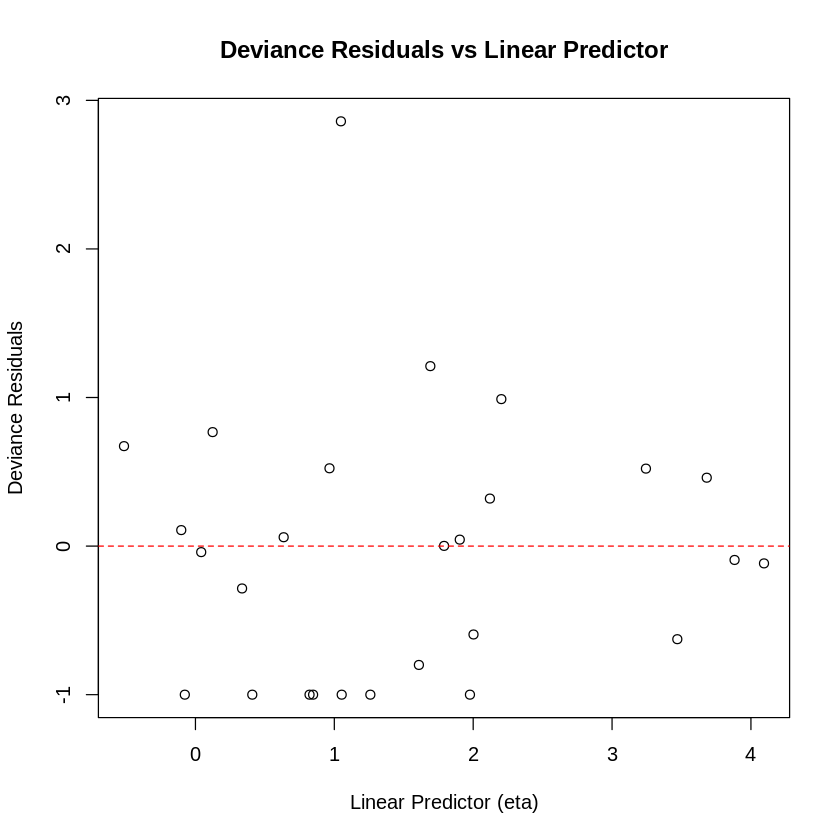

In [30]:
# Extract the deviance residuals and the linear predictor (eta)
plot(x = model$linear.predictors, y = model$residual,
     xlab = "Linear Predictor (eta)",
     ylab = "Deviance Residuals",
     main = "Deviance Residuals vs Linear Predictor",
     )
abline(h = 0, lty = 2, col = "red") # Add horizontal line at y = 0

In this plot:

1. **No Clear Pattern**: In this plot, the residuals are scattered around the zero line, and there does not seem to be a strong systematic pattern. This indicates that the model's assumptions may be approximately valid, though the presence of any structure or trends should be carefully assessed.

2. **Outliers**: Some points lie farther from the zero line, indicating potential outliers. These points have larger residuals, meaning the model may not predict their values as well as others. It would be important to investigate these outliers to understand whether they represent model misfit or data issues.

3. **Heteroscedasticity**: The spread of residuals appears fairly even across the range of linear predictors (η). There is no obvious sign of heteroscedasticity (non-constant variance), which would be a concern if present.

4. **Model Fit**: The plot suggests that the model generally provides a reasonable fit, but the few large residuals might indicate specific data points where the model does not perform well. Further checks (like examining the data points with large residuals) could help improve the model.

#### In general:
- The plot shows no obvious pattern or trend, which suggests the Poisson regression model may be adequate for the data.
- However, some residuals are relatively large, indicating potential outliers or points where the model is not fitting as well as expected.
- Additional investigation into these points could improve model fit.


### 2. (e) Overdispersion

For linear regression, the variance of the data is controlled through the standard deviation $\sigma$, which is independent of the other parameters like the mean $\mu$. However, some GLMs do not have this independence, which can lead to a problem called overdispersion. Overdispersion occurs when the observed data's variance is higher than expected, if the model is correct. 

For Poisson Regression, we expect that the mean of the data should equal the variance. If overdispersion is present, then the assumptions of the model are not being met and we can not trust its output (or our beloved p-values)!

Explore the two models fit in the beginning of this question for evidence of overdisperion. If you find evidence of overdispersion, you do not need to fix it (but it would be useful for you to know how to). Describe your process and conclusions.


Call:
glm(formula = incidents ~ type + period + year, family = poisson, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0775  -1.9869  -0.0418   0.7612   3.6618  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5644     0.2199   7.113 1.13e-12 ***
typeB         1.6795     0.1889   8.889  < 2e-16 ***
typeC        -2.0789     0.4408  -4.717 2.40e-06 ***
typeD        -1.1551     0.2930  -3.943 8.06e-05 ***
typeE        -0.5113     0.2781  -1.839   0.0660 .  
period75      0.4123     0.1282   3.216   0.0013 ** 
year65        0.4379     0.1885   2.324   0.0201 *  
year70        0.2260     0.1916   1.180   0.2382    
year75        0.1436     0.3147   0.456   0.6481    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 109.21  on 18  degrees of freedom
AIC: 200.92

Numbe


Call:
glm(formula = incidents ~ type + period, family = poisson, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2377  -1.9003  -0.1372   0.6377   3.8906  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7190     0.1838   9.355  < 2e-16 ***
typeB         1.7831     0.1781  10.014  < 2e-16 ***
typeC        -2.0573     0.4394  -4.683 2.83e-06 ***
typeD        -1.1281     0.2918  -3.866 0.000111 ***
typeE        -0.4831     0.2767  -1.746 0.080787 .  
period75      0.4723     0.1222   3.865 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 115.63  on 21  degrees of freedom
AIC: 201.34

Number of Fisher Scoring iterations: 6


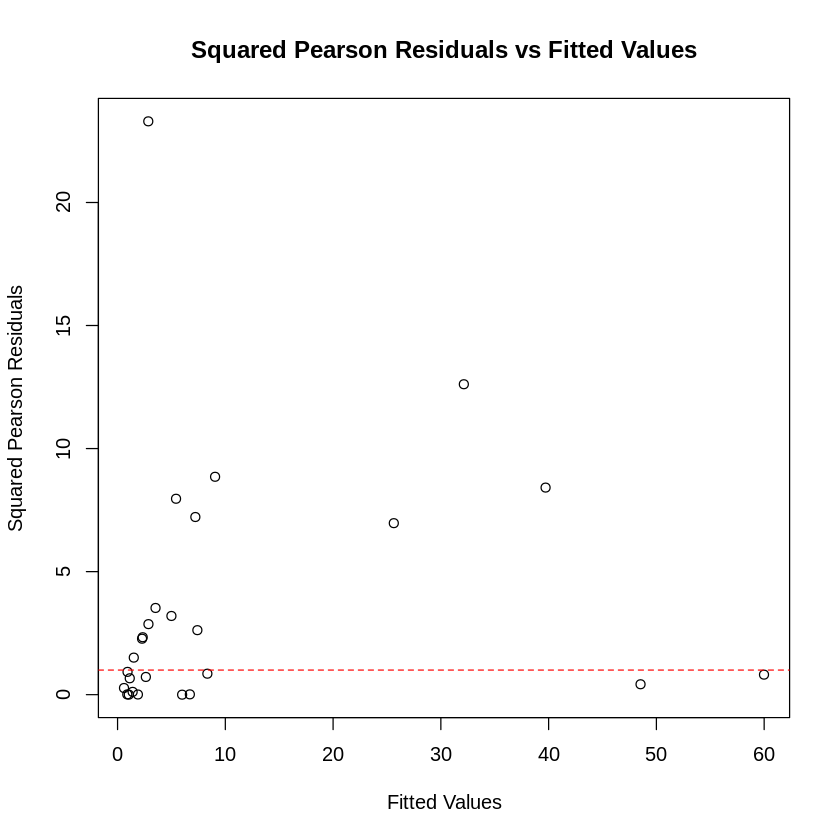

In [41]:
# Calculate the dispersion statistic for model1
summary(model)
summary(noyear_model)

# calculate pearson residuals
pearson_residuals = residuals(model, type = "pearson")

# Plot Squared Pearson Residuals vs Fitted Values
plot(fitted(model), pearson_residuals^2, 
     xlab = "Fitted Values", 
     ylab = "Squared Pearson Residuals",
     main = "Squared Pearson Residuals vs Fitted Values")
abline(h = 1, col = "red", lty = 2)


1.Observe the ratio of residual bias and degrees of freedom:

- Model 1 (with years): residual deviance = 109.21, degrees of freedom = 18
Deviance/df ≈ 109.21 / 18 ≈ 6.07
- Model 2 (without year): residual deviation = 115.63, degrees of freedom = 21
Deviance/df ≈ 115.63 / 21 ≈ 5.51

Typically, if the ratio of residual deviance to degrees of freedom is significantly greater than one, it indicates possible overdispersion. For both models, the ratios are significantly greater than 1 (6.07 and 5.51), which could mean that there is overdispersion in the data.

2.Comparison of AIC in the models:

AIC for model 1 = 200.92
AIC for model 2 = 201.34
Although the AIC was not significantly different between the two models, the ratio of residual bias to degrees of freedom is a more direct reflection of the potential for overdispersion.